# **Superstore Sales**

In [ ]:


# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment-4/train.csv',index_col=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


# **1. Understand Dataset**
Explore the structure of the dataset, including the number of rows and columns.

In [ ]:
df.shape

(9800, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [ ]:
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

# **2. Data Cleaning**
Handle missing values, if any, and check for any anomalies in the data.


In [ ]:
# replace ' ' to '_' in all columns name

#df.columns = df.columns.str.replace(' ','_',regex=False)


In [ ]:
# show null valuses in Postal_Code

df['Postal Code'].isnull().sum()


11

In [ ]:
# remove Postal_Code null valuses

df = df.dropna(subset=['Postal Code'])


In [ ]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


# **3. Data Types**
Check the data types of each column. Ensure they are appropriate for the analysis.

In [ ]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

# **4. Descriptive Statistics**
Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [ ]:
# prompt: 4. Descriptive Statistics: Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

df.describe()


,Postal Code,Sales
count,9789.000000,9789.000000
mean,55273.322403,230.116193
std,32041.223413,625.302079
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.384000
75%,90008.000000,210.392000
max,99301.000000,22638.480000


# **5. Histogram**
Create histograms to visualize the distribution of key numeric variables.


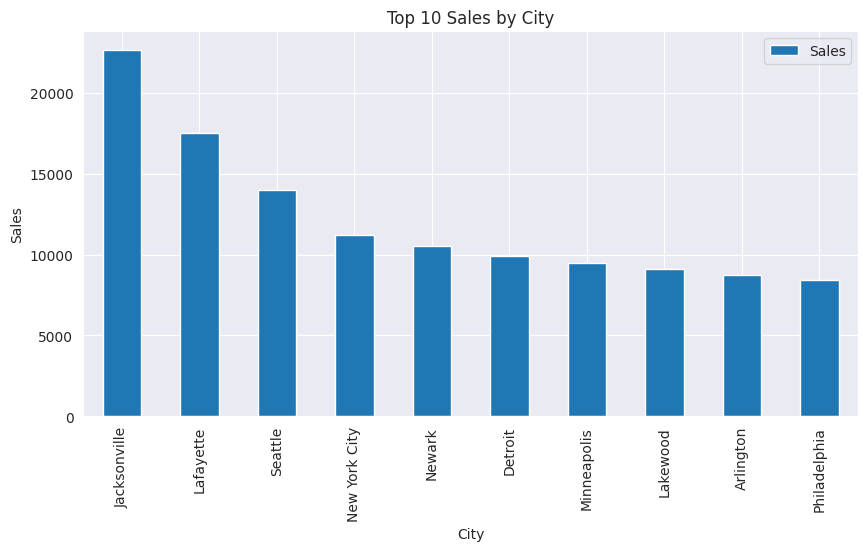

In [ ]:
# Create a histogram chart for top 10 sales and city

top_10_sales = df.sort_values('Sales', ascending=False).head(10)
top_10_sales.plot(kind='bar', x='City', y='Sales', figsize=(10,5))
plt.title('Top 10 Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()


# **6. Time Series Plots**
Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

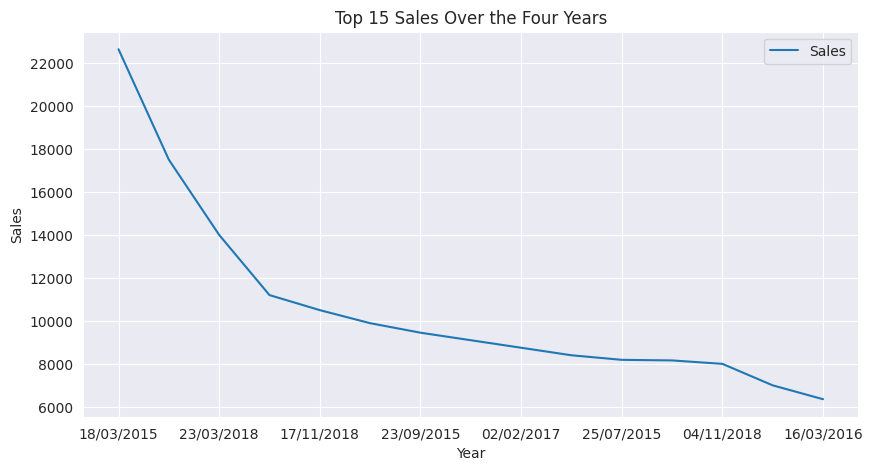

In [ ]:
# prompt: Show a line graph chart for top 15 high sales over the whole four years

top_15_sales = df.sort_values('Sales', ascending=False).head(15)
top_15_sales.plot(kind='line', x='Order Date', y='Sales', figsize=(10,5))
plt.title('Top 15 Sales Over the Four Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


# **7. Seasonal Decomposition**
Decompose time series data into components like trend, seasonality, and residuals for deeper insights.

In [ ]:
# Seasonal Decomposition Decompose time series data into components like trend, seasonality, and residuals for deeper insights.

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(resampled_data['Sales'], model='additive')
decomposed.plot()
plt.show()


NameError: name 'resampled_data' is not defined

In [ ]:
# prompt: Seasonal Decomposition Decompose time series data into components like trend, seasonality, and residuals for deeper insights.

df['Order Date'] = pd.to_datetime(df['Order Date'])
resampled_data = df.resample('M').sum()
decomposed = seasonal_decompose(resampled_data['Sales'], model='additive')
decomposed.plot()
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

# **8. Box Plots**
Use box plots to identify outliers and understand the distribution of numeric variables.

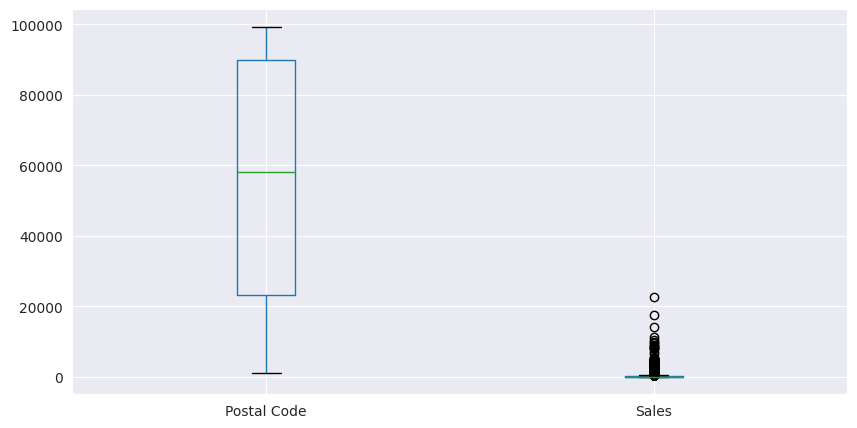

In [ ]:
# Box Plots: Use box plots to identify outliers and understand the distribution of numeric variables.

df.boxplot(figsize=(10,5))
plt.show()


# **9. Sales Distribution by Category**
Visualize the distribution of sales across different categories using bar charts or pie charts

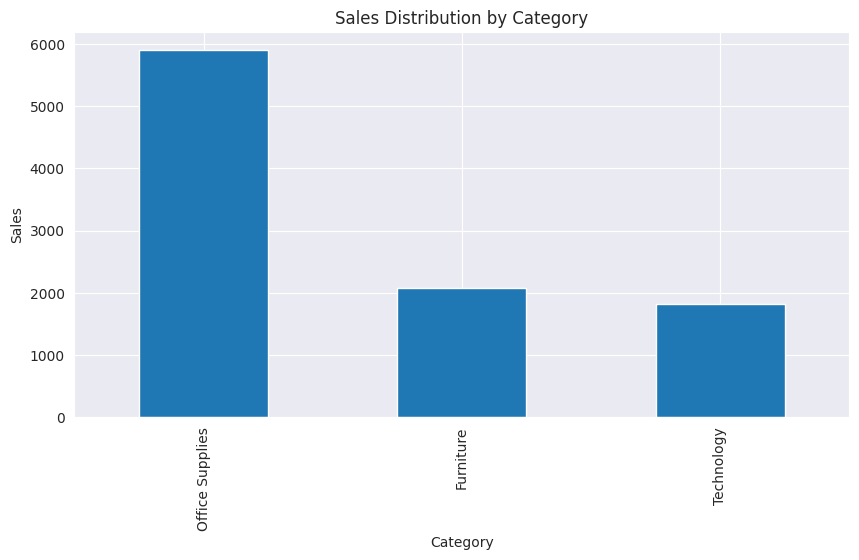

In [ ]:
# Sales Distribution by Category: Visualize the distribution of sales across different categories using bar charts or pie charts

df['Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


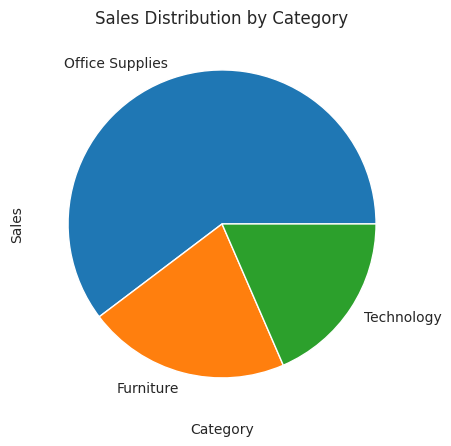

In [ ]:
# Create a pie chart for category and sales

df['Category'].value_counts().plot(kind='pie', figsize=(10,5))
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


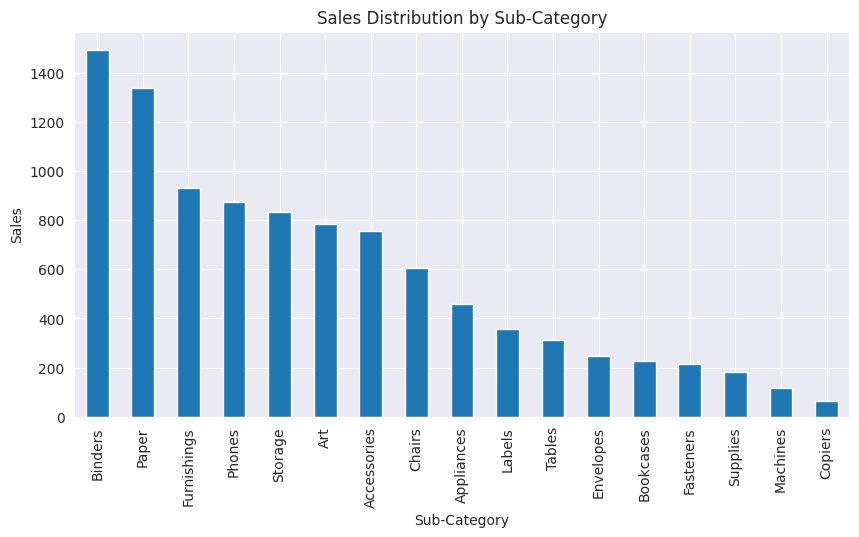

In [ ]:
# Create bargraph To show sub category and sales

df['Sub-Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Sales Distribution by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()


# **10. Sales Variation Over Time**
Plot line charts to observe how sales vary over different time periods (months, quarters, years).

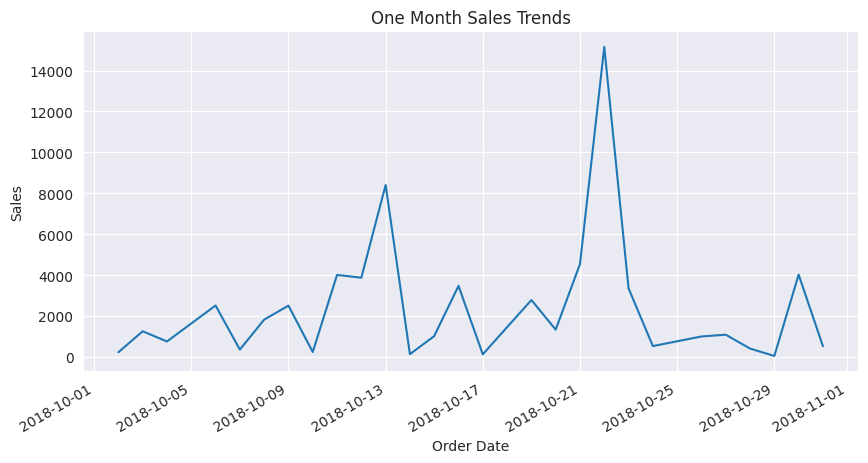

In [ ]:
# Create a  October 30days sales report in 2018

df.loc[(df['Order Date'] >= '2018-10-01') & (df['Order Date'] <= '2018-10-31')].groupby('Order Date')['Sales'].sum().plot(kind='line', figsize=(10,5))
plt.title('One Month Sales Trends')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


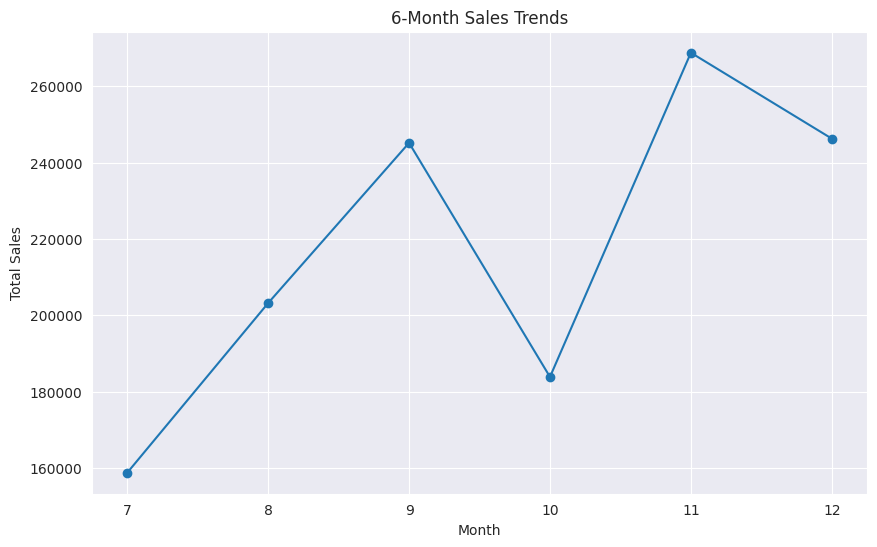

In [ ]:
# Step 1: Convert the 'invoice_Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Create a new column for the month
df['month'] = df['Order Date'].dt.month

# Step 3: Group by month and calculate the total sales for each month
monthly_sales = df.groupby('month')['Sales'].sum()

# Step 4: Plot the 6-month sales trends
plt.figure(figsize=(10, 6))
monthly_sales[-6:].plot(marker='o')  # Select the last 6 months
plt.title('6-Month Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


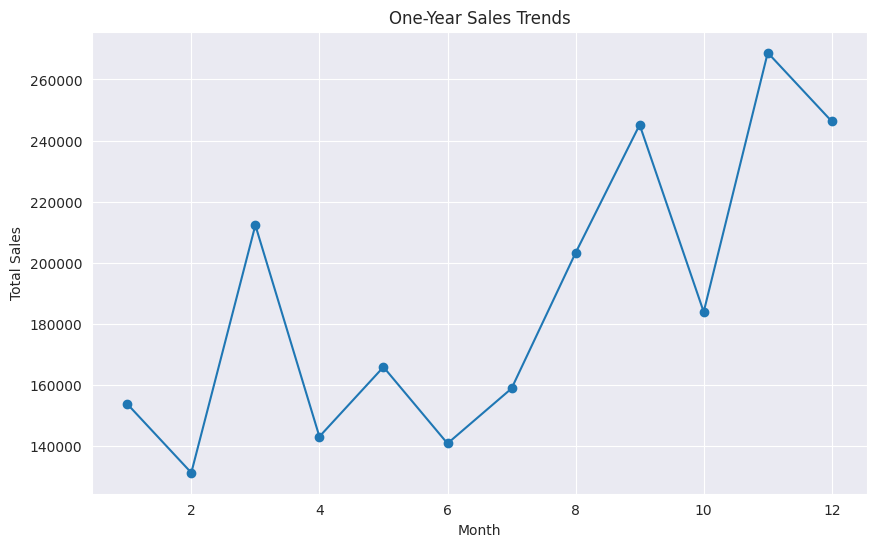

In [ ]:
# Step 1: Convert the 'invoice_Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Create a new column for the month
df['month'] = df['Order Date'].dt.month

# Step 3: Group by month and calculate the total sales for each month
monthly_sales = df.groupby('month')['Sales'].sum()

# Step 4: Plot the one-year sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('One-Year Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# **1. Correlation Analysis**
Examine the correlation between sales and other relevant numeric variables.

In [ ]:
# Correlation Analysis: Examine the correlation between sales and other relevant numeric variables. remove month

# Correlation Matrix
df.corr().drop(columns=['month'])


,Postal Code,Sales,Month,Year
Postal Code,1.000000,-0.024067,0.025064,0.006418
Sales,-0.024067,1.000000,-0.009862,-0.010192
month,0.025064,-0.009862,1.000000,-0.047635
Month,0.025064,-0.009862,1.000000,-0.047635
Year,0.006418,-0.010192,-0.047635,1.000000


# **2. Scatter Plots:**
Plot scatter plots to explore the relationship between sales and another numeric variable.

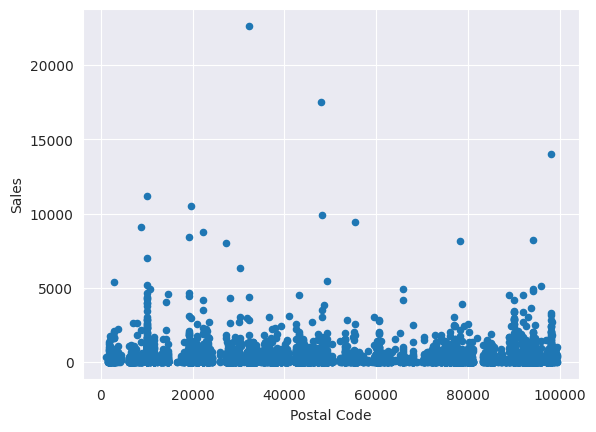

In [ ]:
# Scatter Plots: Plot scatter plots to explore the relationship between sales and another numeric variable.

df.plot(x='Postal Code', y='Sales', kind='scatter')
plt.show()


# **3. Pair Plots**
Use pair plots for a quick overview of relationships between multiple numeric variables.

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month,Month,Year
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,8,2017
2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,8,2017
3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,12,2017
4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,11,2016
5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,11,2016


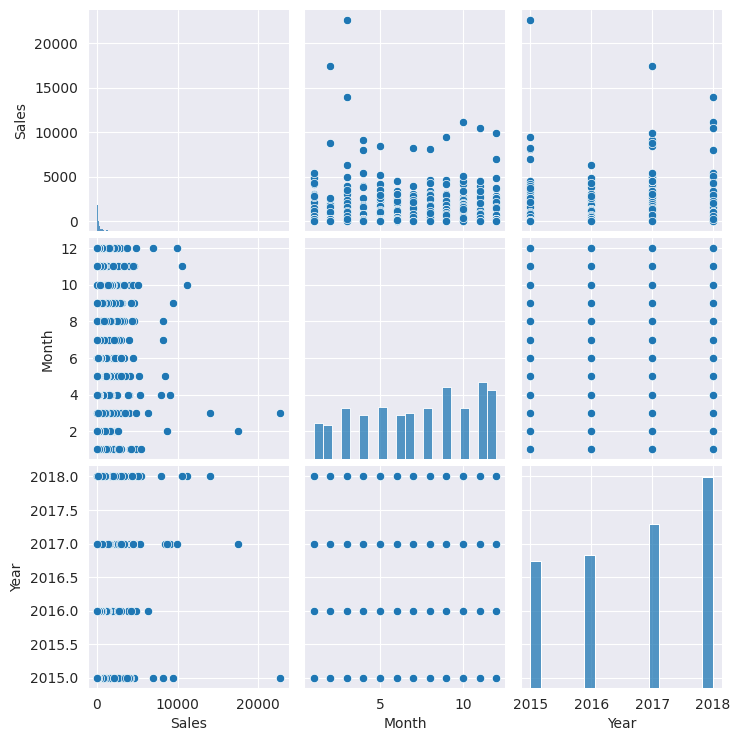

In [ ]:
# Pair Plots: Use pair plots for a quick overview of relationships between multiple numeric variables. Differentiate with different color palettes

sns.pairplot(df, vars=['Sales', 'Month', 'Year'],palette='husl')
plt.show()



# **4. Category-wise Sales Trends**
Analyze how sales trends differ across different categories using line charts.

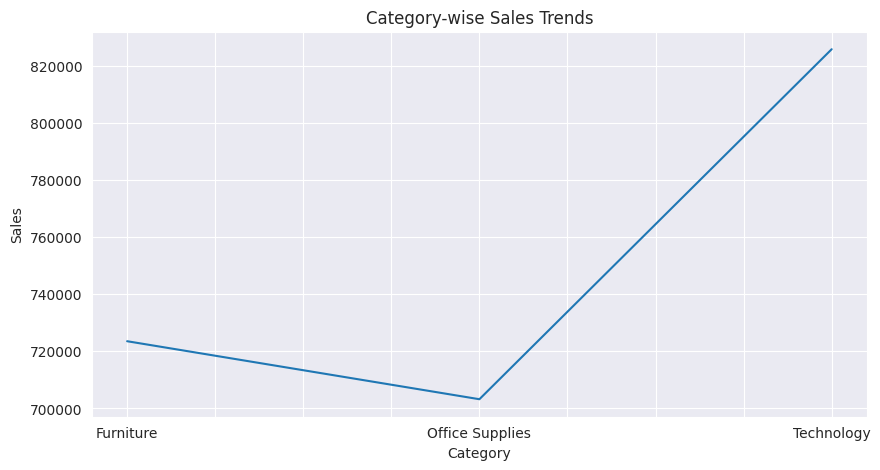

In [ ]:
# Category-wise Sales Trends: Analyze how sales trends differ across different categories using line charts.

df.groupby('Category')['Sales'].sum().plot(kind='line', figsize=(10,5))
plt.title('Category-wise Sales Trends')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


# **5. Heatmaps**
Create heatmaps to visualize the correlation matrix for better insights.


In [ ]:
# Remove column month

df.drop('month', axis=1, inplace=True)df

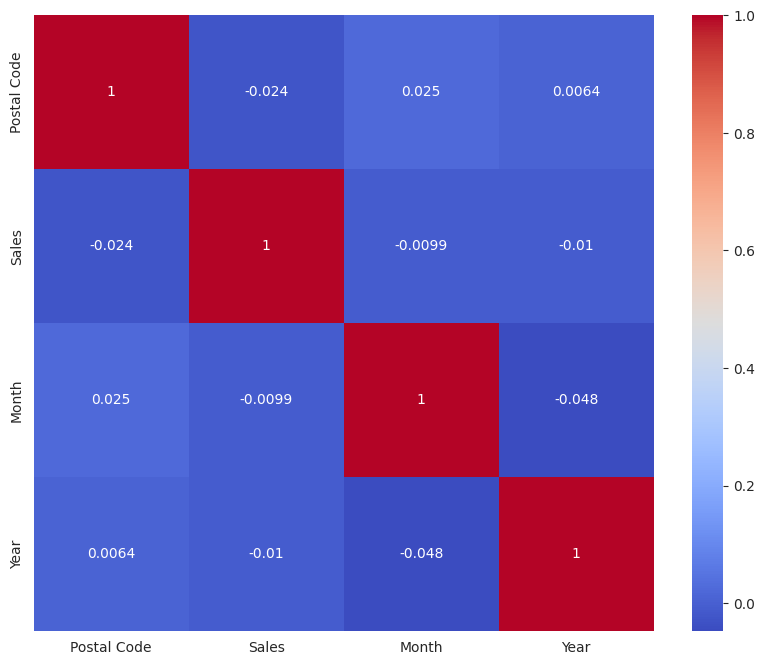

In [ ]:
# Heatmaps: Create heatmaps to visualize the correlation matrix for better insights.

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# **6. Sales by Region**
Compare sales across different regions using bar charts or stacked bar charts.

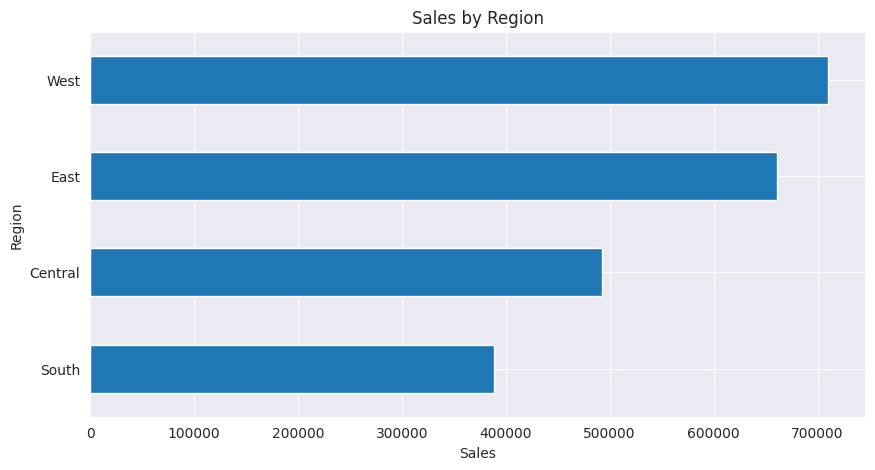

In [ ]:
# Sales by Region: Compare sales across different regions using bar charts or stacked bar charts in Ascending order

df.groupby('Region')['Sales'].sum().sort_values(ascending= True).plot(kind='barh', figsize=(10,5))
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()


# **7. Customer Segment Analysis**
Explore sales trends for different customer segments using line charts or bar charts.

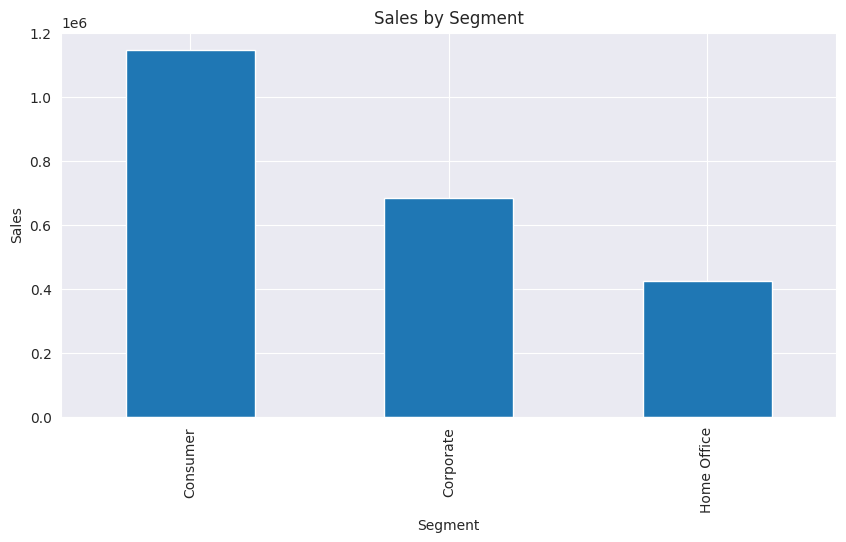

In [ ]:
# Customer Segment Analysis: Explore sales trends for different customer segments using line charts or bar charts.

df.groupby('Segment')['Sales'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()



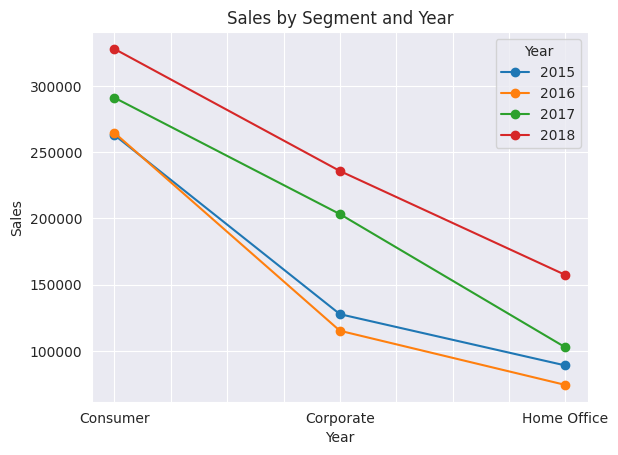

In [ ]:
# Customer Segment Analysis: Explore sales trends for different customer segments using line charts

df.groupby(['Segment', 'Year'])['Sales'].sum().unstack().plot(marker='o')
plt.title('Sales by Segment and Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


# **8. Sales vs. Quantity**
Investigate the relationship between sales and quantity sold using scatter plots.

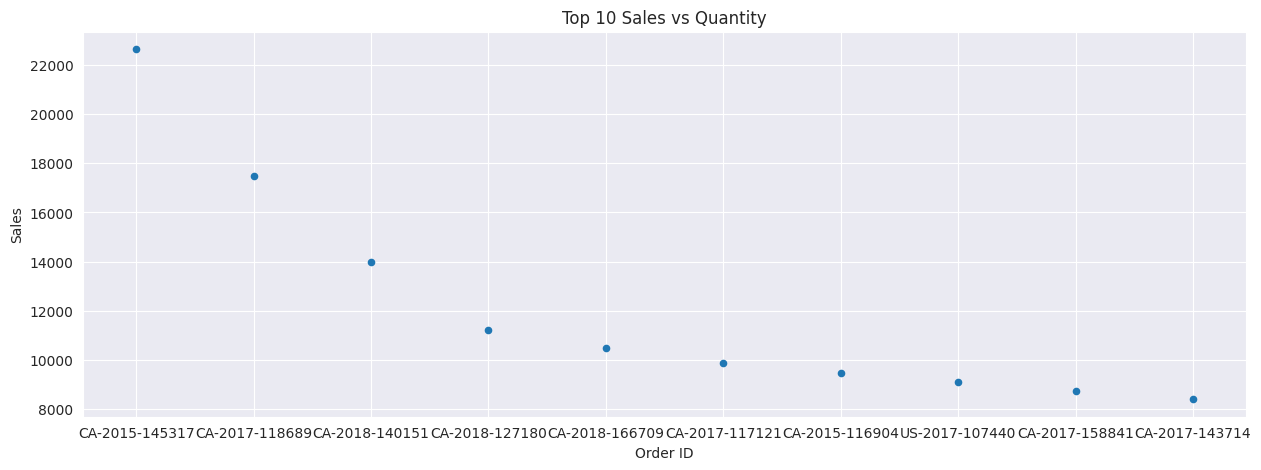

In [ ]:
# Sales vs Quantity top Investigate the relationship between sales and quantity sold using big scatter plots.

top_10_sales = df.sort_values('Sales', ascending=False).head(10)
top_10_sales.plot(x='Order ID', y='Sales', kind='scatter', figsize=(15,5))
plt.title('Top Sales vs Quantity')
plt.xlabel('Order ID')
plt.ylabel('Sales')
plt.show()


# **9. Customer Segment vs Quantity**
Compare the quantity sold across different customer segments using bar charts.

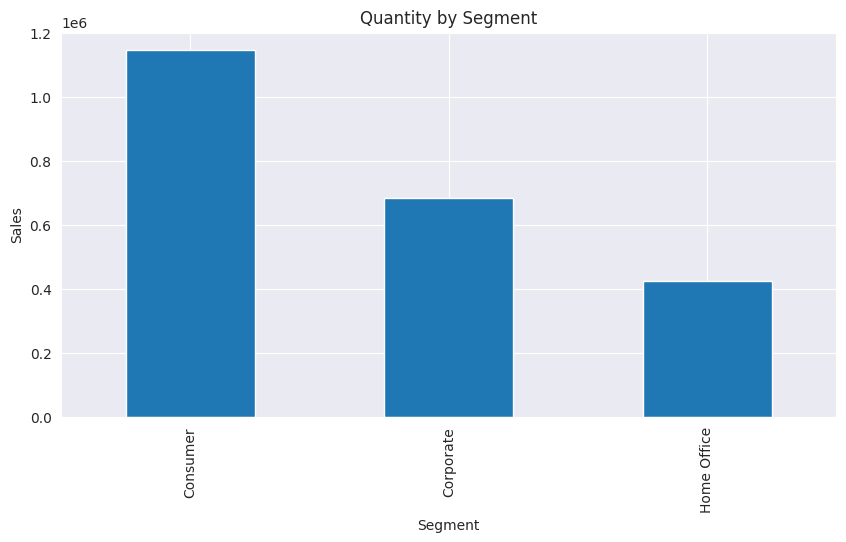

In [ ]:
# Customer Segment vs Quantity to Compare the quantity sold across different customer segments using bar charts.

df.groupby('Segment')['Sales'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Quantity by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


# **10. Discount Impact on Sales**
Analyze the impact of discounts on sales using bar charts or line charts.

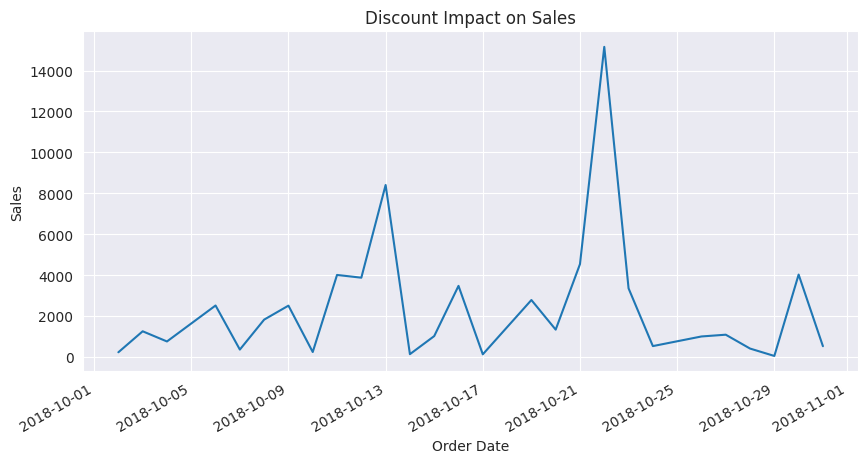

In [ ]:
# prompt: 10. Discount Impact on Sales: Analyze the impact of discounts on sales using bar charts or line charts.

df.loc[(df['Order Date'] >= '2018-10-01') & (df['Order Date'] <= '2018-10-31')].groupby('Order Date')['Sales'].sum().plot(kind='line', figsize=(10,5))
plt.title('Discount Impact on Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

# **11. Shipping Mode vs Sales**
Explore the relationship between shipping modes and sales using categorical plots.

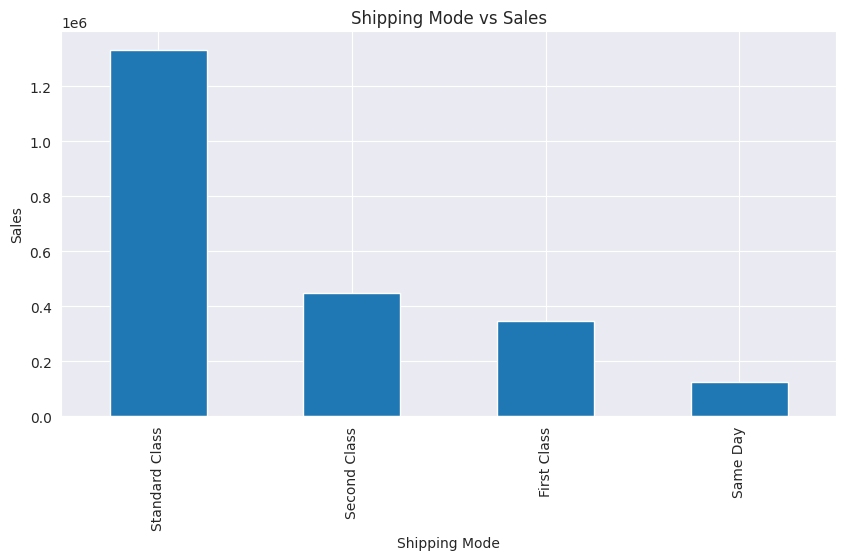

In [ ]:
# prompt: 11. Shipping Mode vs. Sales: Explore the relationship between shipping modes and sales using categorical plots Representing In a descending order

df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending= False).plot(kind='bar', figsize=(10,5))
plt.title('Shipping Mode vs Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()


# **12. Product-wise Sales Analysis**
Investigate how sales vary for different products or categories using bar charts or line charts.

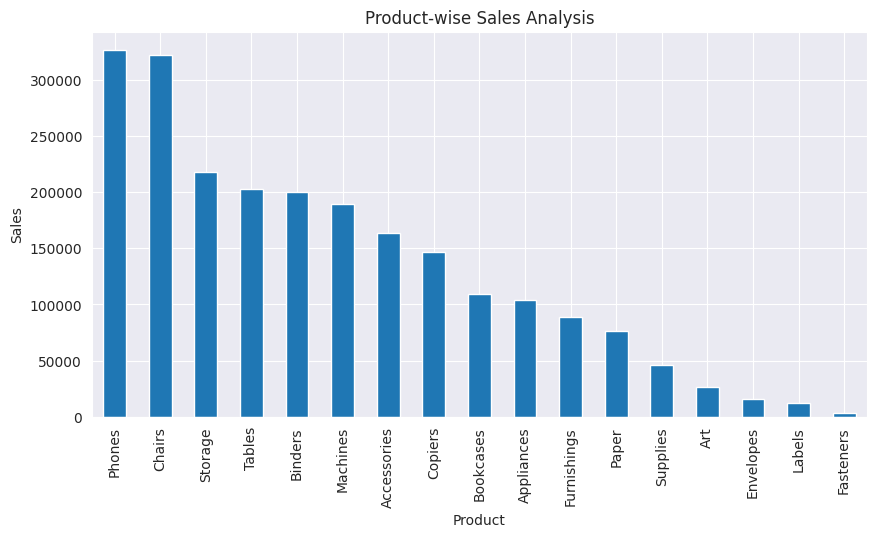

In [ ]:
# prompt: Product-wise Sales Analysis: Investigate how sales vary for different products or categories using bar charts or line charts Represent in a descending order

df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending= False).plot(kind='bar', figsize=(10,5))
plt.title('Product-wise Sales Analysis')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()


# **13. Region-wise Product Sales**
Compare product sales across different regions using grouped bar charts.

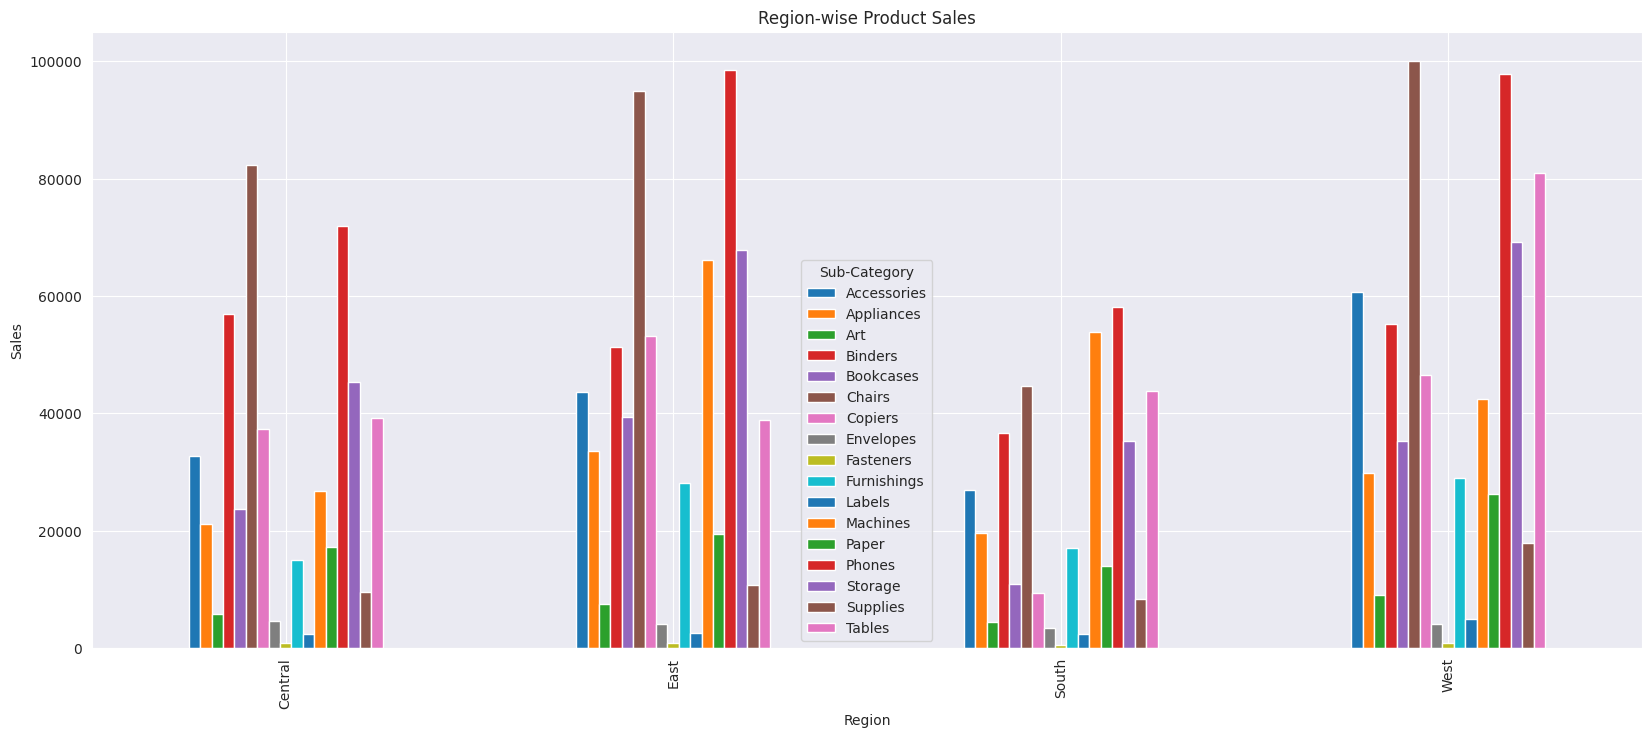

In [ ]:
# prompt: Region-wise Product Sales: Compare product sales across different regions using grouped bar charts.

df.groupby(['Region', 'Sub-Category'])['Sales'].sum().unstack().plot(kind='bar', figsize=(20,8))
plt.title('Region-wise Product Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


# **14.Document Finding**
Summarize key findings from both univariate and bivariate analyses. Highlight any notable trends or insights.


### Univariate Analysis:

1. **Dataset Overview:**
   - The dataset contains 9800 entries and 17 columns.
   - Columns include information such as Order ID, Order Date, Ship Date, Ship Mode, Customer details, Product details, and Sales.

2. **Data Cleaning:**
   - There were 11 null values in the 'Postal Code' column, and these rows were removed.
   - After data cleaning, there are no missing values in the dataset.

3. **Data Types:**
   - Most columns are of object type, representing categorical data, while 'Sales' and 'Postal Code' are float64.

4. **Descriptive Statistics:**
   - Descriptive statistics for numeric variables like 'Sales' were provided, giving an overview of the central tendency and dispersion.

5. **Histograms:**
   - A bar chart was created to visualize the distribution of the top 10 sales across different cities.

6. **Time Series Plots:**
   - Line charts were used to observe the sales trends over the four-year period, showcasing the top 15 sales.

7. **Seasonal Decomposition:**
   - Time series data was decomposed into trend, seasonality, and residuals using seasonal decomposition.

8. **Box Plots:**
   - Box plots were used to identify outliers and understand the distribution of numeric variables.

9. **Sales Distribution by Category:**
   - Bar charts and pie charts were used to visualize the distribution of sales across different product categories and sub-categories.

10. **Sales Variation Over Time:**
    - Line charts were used to observe sales variation over different time periods, such as monthly and yearly trends.

### Bivariate Analysis:

1. **Correlation Analysis:**
   - A correlation matrix was generated, showing the correlation between 'Sales' and other relevant numeric variables.

2. **Scatter Plots:**
   - A scatter plot was used to explore the relationship between 'Sales' and 'Postal Code'.

3. **Pair Plots:**
   - Pair plots were created to visualize relationships between multiple numeric variables.

4. **Category-wise Sales Trends:**
   - Line charts were used to analyze how sales trends differ across different product categories.

5. **Heatmaps:**
   - A heatmap of the correlation matrix was generated for better insights.

6. **Sales by Region:**
   - Bar charts were used to compare sales across different regions.

7. **Customer Segment Analysis:**
   - Bar charts and line charts were used to explore sales trends for different customer segments.

8. **Sales vs. Quantity:**
   - Scatter plots were used to investigate the relationship between sales and quantity sold.

9. **Customer Segment vs Quantity:**
   - Bar charts were used to compare the quantity sold across different customer segments.

10. **Discount Impact on Sales:**
    - A line chart was used to analyze the impact of discounts on sales.

11. **Shipping Mode vs Sales:**
    - Bar charts were used to explore the relationship between shipping modes and sales.

12. **Product-wise Sales Analysis:**
    - Bar charts were used to investigate how sales vary for different product sub-categories.

13. **Region-wise Product Sales:**
    - Grouped bar charts were used to compare product sales across different regions.

### Overall Insights:

- The dataset is well-cleaned, with no missing values after the removal of null entries.
- Sales distribution varies across different categories and regions.
- Time series analysis reveals monthly and yearly trends in sales.
- Different customer segments show varying sales patterns.
- Discounts and shipping modes have an impact on sales.
- Product-wise analysis provides insights into top-selling categories and regions.

These findings provide a comprehensive understanding of the Superstore Sales dataset, offering valuable insights for further analysis or decision-making.